In [72]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('Netflix Shows.csv')
# print(df.shape)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              996 non-null    object 
 1   rating             925 non-null    object 
 2   ratingLevel        866 non-null    object 
 3   ratingDescription  925 non-null    float64
 4   release_year       925 non-null    float64
 5   user_rating score  560 non-null    float64
 6   user rating_size   925 non-null    float64
dtypes: float64(4), object(3)
memory usage: 54.6+ KB


In [106]:
df = df.dropna()
print(df.shape)

(529, 7)


In [107]:
df.head()

,title,rating,ratingLevel,ratingDescription,release_year,user_rating score,user rating_size
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016.0,98.0,80.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2008.0,98.0,80.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70.0,2014.0,94.0,80.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016.0,95.0,80.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110.0,2013.0,97.0,80.0


In [86]:
df['title'] = df.title.astype('object')
# df['release year'] = df.release year.astype('float64')
df['ratingDescription'] = df.ratingDescription.astype('float64')
df['rating'] = df.rating.astype('object')

In [111]:
df1 = df[[x for x in df.columns if 'rating' in x] + ['release_year']]\
    .groupby('release_year').sum()
df1.head(10)
# df1 = df[['ratingDescription'] + ['title']]\
#     .groupby('release_year').sum()
# df1.head(10)

,ratingDescription,user_rating score,user rating_size
release_year,,,
1940.0,105.0,183.0,240.0
1978.0,120.0,172.0,160.0
1982.0,180.0,204.0,240.0
1986.0,140.0,268.0,320.0
1987.0,120.0,116.0,160.0
1990.0,164.0,260.0,320.0
1992.0,70.0,140.0,160.0
1993.0,490.0,765.0,720.0
1994.0,360.0,492.0,480.0


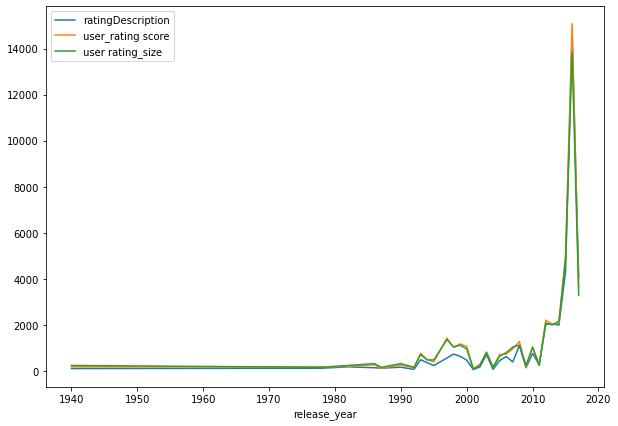

In [112]:
df1.plot()

На основе выше полученной визуализации можно сделать вывод, что в период с 2010-2020 год начали делать более качественные и интересные сериалы. Об этом нам говорит повышающаяся статистика рейтинга(оценка пользователя) сериала.

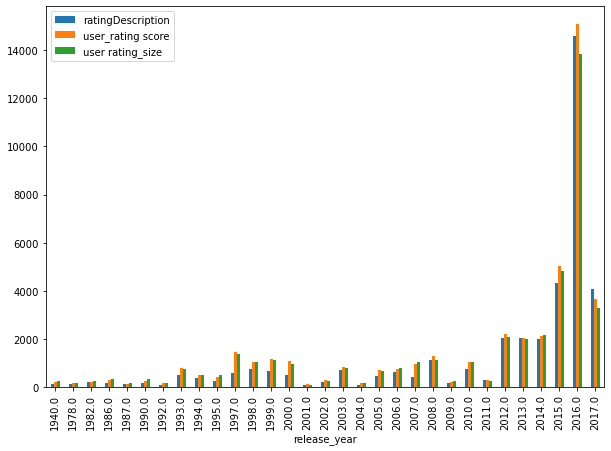

In [113]:
# Параметр rot отвечает за угол наклона подписей к оси x.
df1.plot(kind='bar', rot=90)

Из этого графика можно увидеть, что в 2016 году выходили самые высокооценённые сериалы. Далее рейтинг сериалов идёт на спад.

In [114]:
top_titles_df = df.groupby('title')[['user rating_size']].sum()\
    .sort_values('user rating_size', ascending=False).head(10)
    
top_titles_df

,user rating_size
title,
13 Reasons Why,640.0
Prison Break,560.0
The Iron Giant,480.0
Pretty Little Liars,480.0
New Girl,480.0
Shameless (U.S.),480.0
The Vampire Diaries,480.0
Grace and Frankie,480.0
Anastasia,480.0


In [115]:
top_titles_df.style.bar()

,user rating_size
title,
13 Reasons Why,640.000000
Prison Break,560.000000
The Iron Giant,480.000000
Pretty Little Liars,480.000000
New Girl,480.000000
Shameless (U.S.),480.000000
The Vampire Diaries,480.000000
Grace and Frankie,480.000000
Anastasia,480.000000


На основе этой визуализации видно, что наиболее популярными сериалы на сайте Нетфликс являются сериалы "13 причин почему" и "Побег".

In [116]:
import seaborn as sns

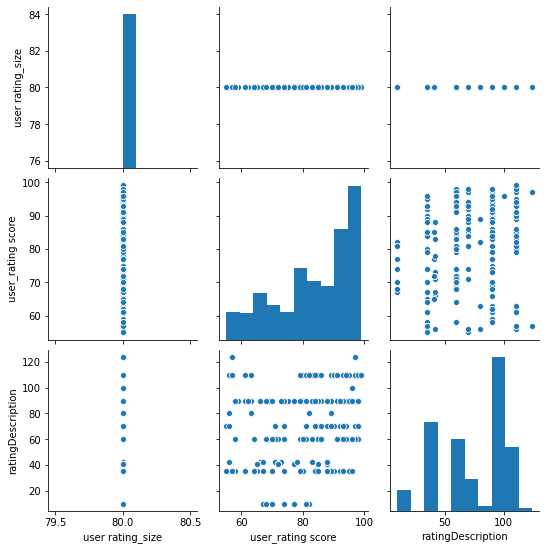

In [117]:
sns_plot = sns.pairplot(
    df[['user rating_size', 'user_rating score', 'ratingDescription']])
sns_plot

In [130]:
df2 = df[['user rating_size'] + ['rating']]\
    .groupby('rating').sum()
df2.head(10)

,user rating_size
rating,
G,4240.0
NR,320.0
PG,6960.0
PG-13,480.0
R,160.0
TV-14,14640.0
TV-G,1920.0
TV-MA,6160.0
TV-PG,3040.0


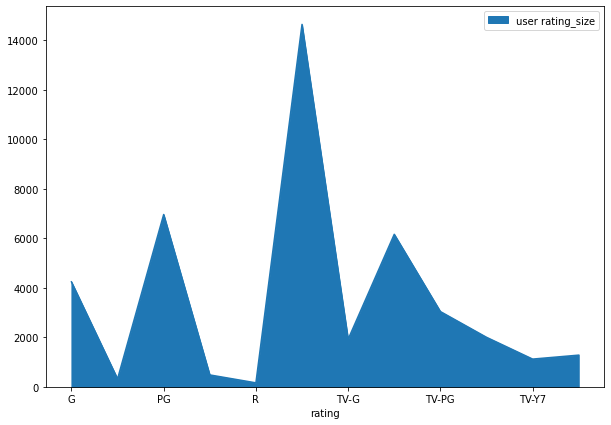

In [131]:
df2[list(filter(lambda x: x != 'rating', df2.columns))]\
    .plot(kind='area', rot=0, stacked=True)

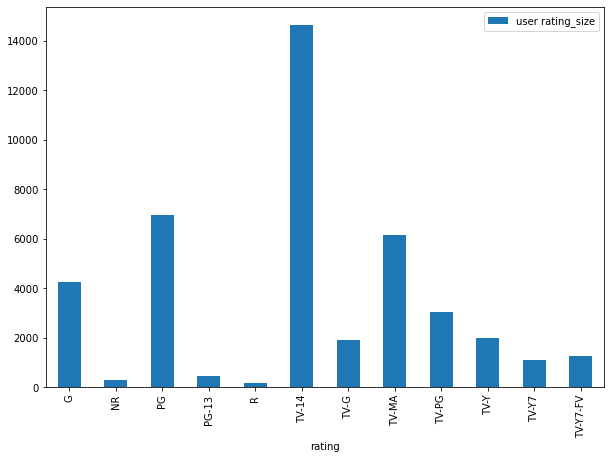

In [133]:
df2.plot(kind='bar', rot=90)

На основе этой визуализации видно, наибольший рейтинг имеют сериалы возрастного ограничения TV-14,то есть сериалы, просмотр которых не рекомендуется лицам до 14 лет.